In [3]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import r_regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

# **Loading the Dataset:**

In [5]:
dataset = pd.read_csv("/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2022.csv")
dataset.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [6]:
count_row = dataset.shape[0] 
print("Number of training examples: ", count_row)
count_col = dataset.shape[1] 
print("Number of features: ", count_col)

Number of training examples:  4078318
Number of features:  61


In [7]:
features_list = list(dataset.columns)
print(features_list)

['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups'

# **Features:**
There are 3 categories of Flight Delays (departure): 
* Small Delays - 5 to 15 minute delays
* Medium Delays - 15 to 45 minute delays
* Large Delays - 45 minutes or more

Reference: https://en.wikipedia.org/wiki/Flight_cancellation_and_delay

## **1. ArrDelayMinutes:**
* This feature represents the Difference in minutes between scheduled and actual departure time.
* The graph shows that most flights are on time (meaning that there is no delay). 
* The number of delayed flights are significantly lower as longer delays are quite rare.

In [8]:
# There are a total of 1552 unique values for this feature
dataset["ArrDelayMinutes"].nunique()

1556

In [9]:
departure = dataset.ArrDelayMinutes.value_counts()

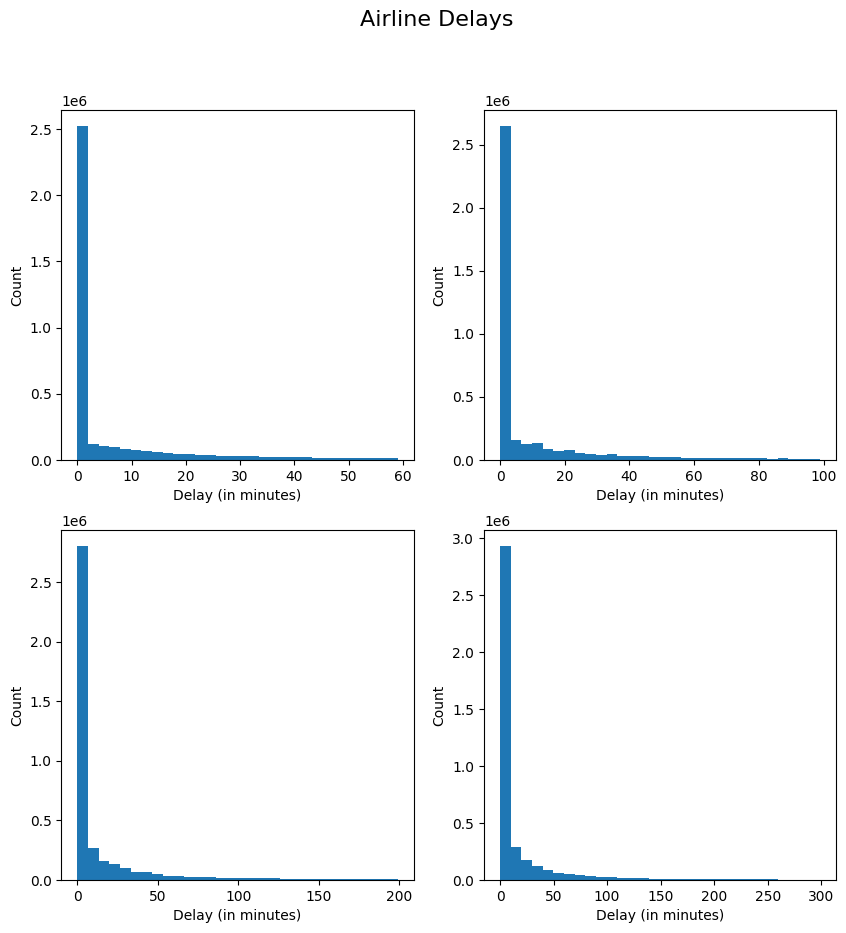

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

dataset.query("ArrDelayMinutes < 60")["ArrDelayMinutes"].plot(kind = "hist", bins = 30, ax = axes[0,0], figsize = (10, 10))
dataset.query("ArrDelayMinutes < 100")["ArrDelayMinutes"].plot(kind = "hist", bins = 30, ax = axes[0,1], figsize = (10, 10))
dataset.query("ArrDelayMinutes < 200")["ArrDelayMinutes"].plot(kind = "hist", bins = 30, ax = axes[1,0], figsize = (10, 10))
dataset.query("ArrDelayMinutes < 300")["ArrDelayMinutes"].plot(kind = "hist", bins = 30, ax = axes[1,1], figsize = (10, 10))

fig.suptitle("Airline Delays", fontsize = 16)
for nn, ax in enumerate(axes.flat):
    ax.set_xlabel("Delay (in minutes)")
    ax.set_ylabel("Count")

<Axes: title={'center': 'Data Distribution'}, ylabel='Frequency'>

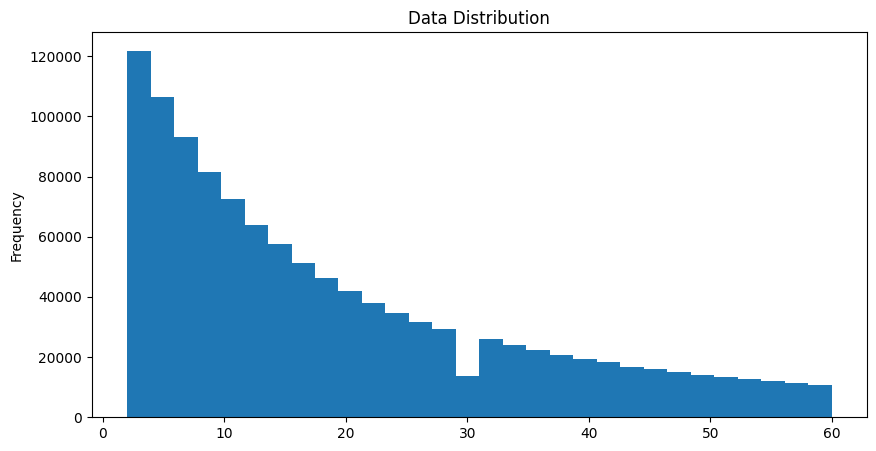

In [12]:
# Since a time of zero means that there is no delay,
# we will look at the data distribution when the time is greater than 1 but less than 60 minutes
plt.xlabel("Delay (in minutes)")
plt.ylabel("Count")
plt.title("Data Distribution")
dataset.query("ArrDelayMinutes > 1 and ArrDelayMinutes < 61")["ArrDelayMinutes"].plot(kind = "hist", bins = 30, figsize = (10, 5))

## **2. Airline**

In [13]:
# There are 21 different airline 
dataset["Airline"].nunique()

21

In [14]:
airlines = dataset.Airline.value_counts()
print(airlines)

Airline
Southwest Airlines Co.                       731925
Delta Air Lines Inc.                         512114
American Airlines Inc.                       495953
SkyWest Airlines Inc.                        440807
United Air Lines Inc.                        352009
Republic Airlines                            197881
JetBlue Airways                              156793
Envoy Air                                    150758
Endeavor Air Inc.                            142624
Comair Inc.                                  135884
Alaska Airlines Inc.                         129510
Spirit Air Lines                             129208
Frontier Airlines Inc.                        86557
Allegiant Air                                 73504
Mesa Airlines Inc.                            71972
Horizon Air                                   56320
Capital Cargo International                   52827
Commutair Aka Champlain Enterprises, Inc.     44367
Hawaiian Airlines Inc.                        42212
Air 

<Axes: title={'center': 'Airlines'}, ylabel='Airline'>

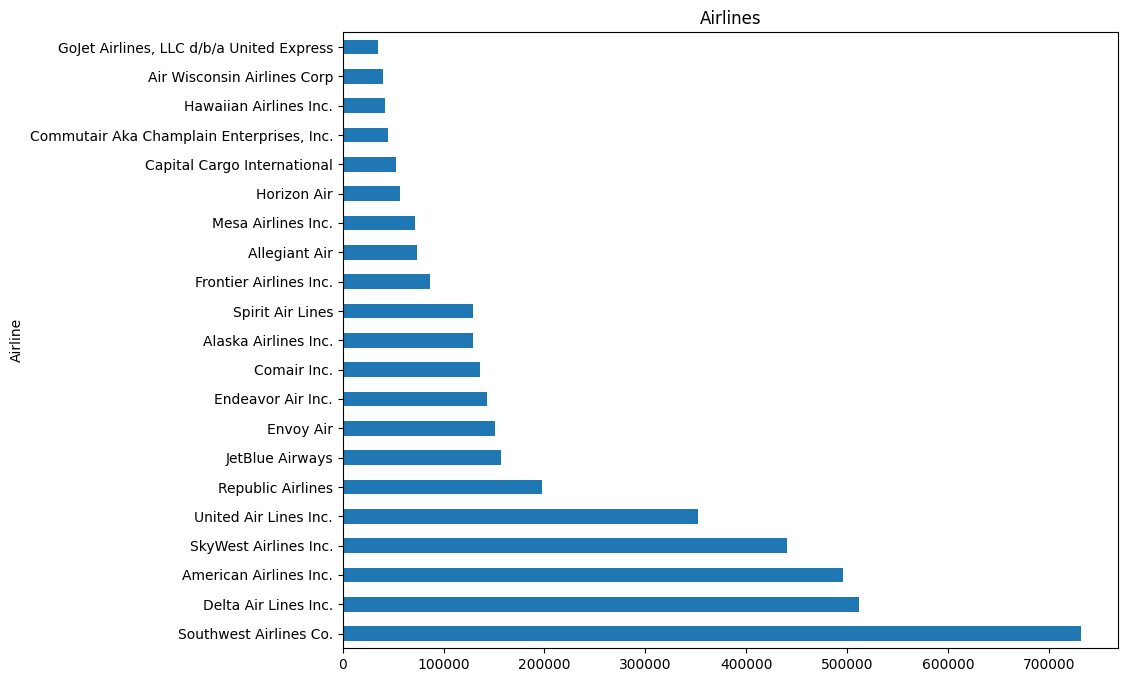

In [15]:
plt.title("Airlines")
airlines.plot(kind = "barh", figsize = (10, 8))

## **Cancelled:**

In [16]:
cancelled = dataset.Cancelled.value_counts()
print(cancelled)

Cancelled
False    3955126
True      123192
Name: count, dtype: int64


<Axes: title={'center': 'Cancellation - Data Distribution'}, ylabel='Cancelled'>

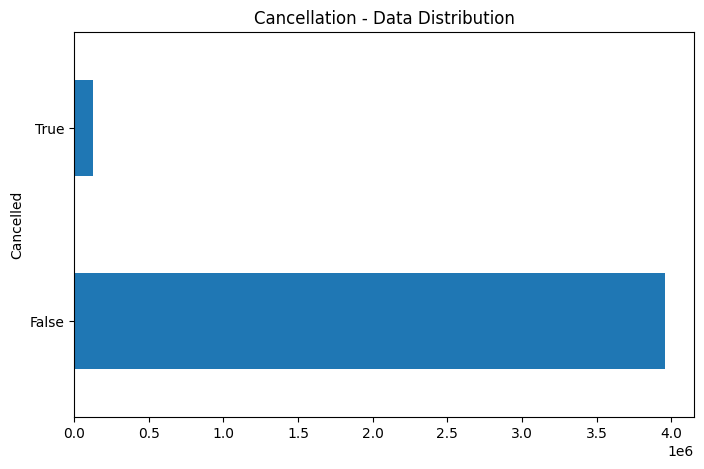

In [17]:
plt.title("Cancellation - Data Distribution")
cancelled.plot(kind = "barh", figsize = (8, 5))

# **Creating a dataframe with the labels for predictions:**

In [18]:
new_df = dataset.copy()

In [19]:
conditions = [
    (new_df["ArrDelayMinutes"] == 0) & (new_df["Cancelled"] == False),
    (new_df["ArrDelayMinutes"] >= 1) & (new_df["ArrDelayMinutes"] <= 15) & (new_df["Cancelled"] == False),
    (new_df["ArrDelayMinutes"] >= 16) & (new_df["ArrDelayMinutes"] <= 45) & (new_df["Cancelled"] == False),
    (new_df["ArrDelayMinutes"] > 45) & (new_df["Cancelled"] == False),
    (new_df["Cancelled"] == True)
    ]

values = ["OnTime", "SmallDelay", "MediumDelay", "LargeDelay", "Cancelled"]

new_df["FlightStatus"] = np.select(conditions, values)

In [20]:
new_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,FlightStatus
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0,OnTime
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0,OnTime
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0,OnTime
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0,OnTime
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0,SmallDelay


In [21]:
new_df.FlightStatus.value_counts()

FlightStatus
OnTime         2455178
SmallDelay      663609
MediumDelay     443196
LargeDelay      382933
Cancelled       123192
0                10210
Name: count, dtype: int64

In [22]:
print("Number of Nan values in ArrDelayMinutes: ", new_df["ArrDelayMinutes"].isna().sum())

Number of Nan values in ArrDelayMinutes:  133402


<Axes: title={'center': 'Flight Status - Data Distribution'}, ylabel='FlightStatus'>

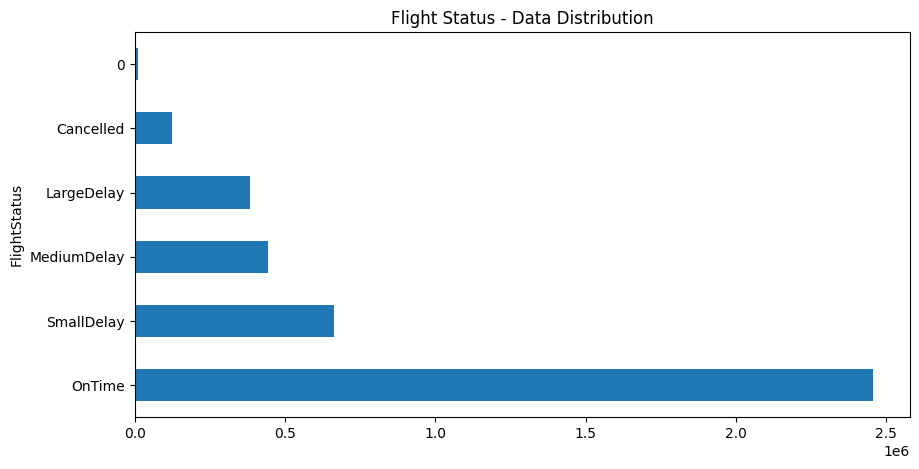

In [23]:
plt.title("Flight Status - Data Distribution")
new_df.FlightStatus.value_counts().plot(kind = "barh", figsize = (10, 5))

In [24]:
# Checking to see which columns in the DataFrame have NaN values
new_df.columns[new_df.isnull().any()]

Index(['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes',
       'AirTime', 'ActualElapsedTime', 'Tail_Number', 'DepDel15',
       'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups'],
      dtype='object')

In [25]:
print("Number of Nan values in DepTime: ", new_df["DepTime"].isna().sum())
print("Number of Nan values in ArrTime: ", new_df["ArrTime"].isna().sum())
print("Number of Nan values in DepDelayMinutes: ", new_df["DepDelayMinutes"].isna().sum())
print("Number of Nan values in ArrDelayMinutes: ", new_df["ArrDelayMinutes"].isna().sum())

Number of Nan values in DepTime:  120433
Number of Nan values in ArrTime:  124239
Number of Nan values in DepDelayMinutes:  120495
Number of Nan values in ArrDelayMinutes:  133402


# **Cleaning the Dataframe:**

### Dropping values and converting time values

In [26]:
dropped_df = new_df.drop(
    ['DOT_ID_Marketing_Airline',
     'IATA_Code_Marketing_Airline',
     'DOT_ID_Operating_Airline',
     'IATA_Code_Operating_Airline',
     'Tail_Number', # Temp
     #'Flight_Number_Operating_Airline', # Temp
     #'OriginAirportSeqID', # Temp
     #'OriginCityMarketID', # Temp
     'OriginCityName',
     'OriginStateFips',
     'OriginStateName',
     'OriginWac',
     #'DestAirportSeqID', # Temp
     #'DestCityMarketID', # Temp
     'DestCityName', 
     'DestStateFips',
     'DestStateName',
     'DestWac',
     'DepDel15',
     'DepartureDelayGroups',
     'DepTimeBlk',
     'ArrDelay',
     'ArrDel15',
     'ArrivalDelayGroups',
     'ArrTimeBlk',
     'TaxiIn',
     'DepDelayMinutes',
     'DepDelay',
     'ArrTime',
     'ArrDelayMinutes',
     'AirTime',
     'ActualElapsedTime',
     'TaxiOut',
     'FlightDate',
     'Cancelled',
     'Year'  
    ], 
    axis=1)

In [27]:
clean_df = dropped_df.copy()

In [28]:
def convertToTimeFloat(value):
    if np.isnan(value):
        return -1
    else:
        #print(value)
        str_val = str(int(value))
        while len(str_val) < 4:
            str_val = '0' + str_val
        if (int(str_val[2:])>=60):
            print('Does not make sense')
            return -1
        retval = int(str_val[:2]) + int(str_val[2:])/60
        return retval

In [29]:
# Converting times to floats
time_features = ['CRSDepTime','DepTime','WheelsOff','WheelsOn','CRSArrTime']
for feature in time_features:
    clean_df[feature]=clean_df[
        feature].apply(lambda x:convertToTimeFloat(x))

In [30]:
# Checking if there are still NaN values
clean_df.columns[clean_df.isnull().any()]

Index([], dtype='object')

In [31]:
# Shape of final cleaned df
clean_df.shape

(4078318, 31)

In [32]:
# Removing the diverted flights
# Checking that all Flightstatus == 0 values are diverted
print("Before drop")
print(clean_df.Diverted.value_counts())
print(clean_df.FlightStatus.value_counts())

print("\nAfter drop")
# Removing rows
clean_df = clean_df[clean_df.FlightStatus != "0"]
print(clean_df.FlightStatus.value_counts())

Before drop
Diverted
False    4068108
True       10210
Name: count, dtype: int64
FlightStatus
OnTime         2455178
SmallDelay      663609
MediumDelay     443196
LargeDelay      382933
Cancelled       123192
0                10210
Name: count, dtype: int64

After drop
FlightStatus
OnTime         2455178
SmallDelay      663609
MediumDelay     443196
LargeDelay      382933
Cancelled       123192
Name: count, dtype: int64


In [33]:
# Shape of final cleaned df
clean_df.shape

(4068108, 31)

### Encoding values

In [34]:
# Encode Categorical Columns
# Encoding some variables as ints due to lack of memory
features_to_encode = ["Airline", "Origin", "Dest", "Marketing_Airline_Network", "Operated_or_Branded_Code_Share_Partners", 
         "Operating_Airline", "OriginState", "DestState"]

le = LabelEncoder()
clean_df[features_to_encode] = clean_df[features_to_encode].apply(le.fit_transform)

In [35]:
y = pd.get_dummies(clean_df.pop("FlightStatus"))
X = clean_df

In [36]:
y

,Cancelled,LargeDelay,MediumDelay,OnTime,SmallDelay
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,False,True
...,...,...,...,...,...
4078310,False,True,False,False,False
4078311,True,False,False,False,False
4078312,False,True,False,False,False
4078314,True,False,False,False,False


In [37]:
X

,Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,CRSElapsedTime,Distance,Quarter,Month,...,OriginState,DestAirportID,DestAirportSeqID,DestCityMarketID,DestState,WheelsOff,WheelsOn,CRSArrTime,DistanceGroup,DivAirportLandings
0,6,141,97,False,11.550000,11.383333,72.0,212.0,2,4,...,5,11292,1129202,30325,5,11.666667,12.333333,12.750000,1,0
1,6,164,171,False,7.533333,7.466667,77.0,295.0,2,4,...,44,12266,1226603,31453,44,7.733333,8.650000,8.816667,2,0
2,6,103,97,False,15.483333,15.233333,70.0,251.0,2,4,...,5,11292,1129202,30325,5,15.583333,16.366667,16.650000,2,0
3,6,171,143,False,14.583333,14.500000,90.0,376.0,2,4,...,44,11973,1197302,31973,24,14.766667,15.716667,16.083333,2,0
4,6,103,97,False,11.583333,11.583333,70.0,251.0,2,4,...,5,11292,1129202,30325,5,11.900000,12.716667,12.750000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078310,16,169,276,False,17.833333,21.083333,71.0,182.0,1,3,...,46,14122,1412202,30198,37,21.316667,21.933333,19.016667,1,0
4078311,16,121,276,False,18.483333,20.550000,97.0,319.0,1,3,...,30,14122,1412202,30198,37,-1.000000,-1.000000,20.100000,2,0
4078312,16,121,223,False,20.583333,23.150000,182.0,946.0,1,3,...,30,13244,1324402,33244,42,23.383333,0.783333,22.616667,4,0
4078314,16,75,121,False,17.550000,18.283333,129.0,529.0,1,3,...,26,11618,1161802,31703,30,-1.000000,-1.000000,19.700000,3,0


In [38]:
print(y.shape)
print(X.shape)

(4068108, 5)
(4068108, 30)


In [39]:
X["Diverted"] = X["Diverted"].astype(int)
X = X.astype(float)
print(X.dtypes)

Airline                                    float64
Origin                                     float64
Dest                                       float64
Diverted                                   float64
CRSDepTime                                 float64
DepTime                                    float64
CRSElapsedTime                             float64
Distance                                   float64
Quarter                                    float64
Month                                      float64
DayofMonth                                 float64
DayOfWeek                                  float64
Marketing_Airline_Network                  float64
Operated_or_Branded_Code_Share_Partners    float64
Flight_Number_Marketing_Airline            float64
Operating_Airline                          float64
Flight_Number_Operating_Airline            float64
OriginAirportID                            float64
OriginAirportSeqID                         float64
OriginCityMarketID             

# **Correlations (Pearson's Correlation Coefficient):**
* Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
* High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
* Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
* Low degree: When the value lies below + .29, then it is said to be a small correlation.
* No correlation: When the value is zero.

In [40]:
correlations = X.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

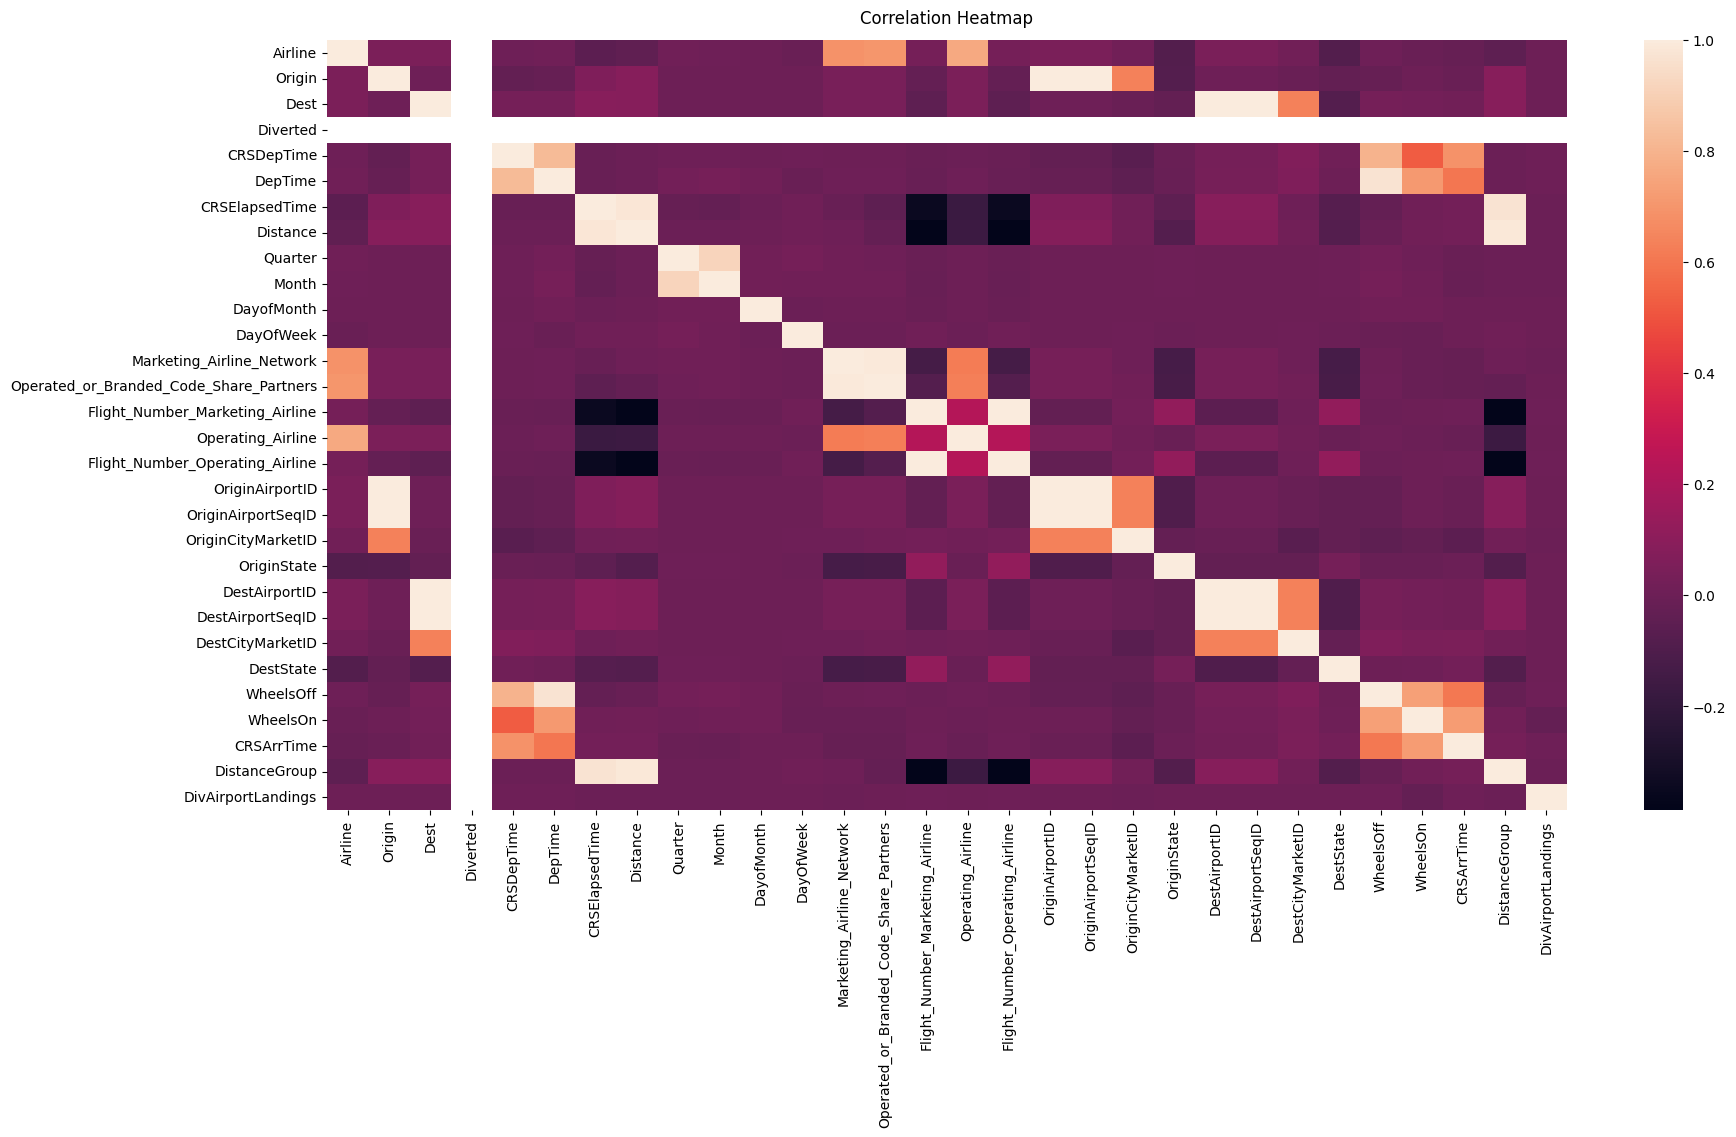

In [41]:
plt.figure(figsize = (20, 10))
heatmap = sns.heatmap(correlations)
heatmap.set_title("Correlation Heatmap", fontdict = {'fontsize':12}, pad = 12)

In [42]:
# Checking if the features have a linear relationship using a residual plot
# Not sure that this can be used for classification problems
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()
del X["const"]

In [43]:
predicted_values = results.fittedvalues
residuals = y - predicted_values

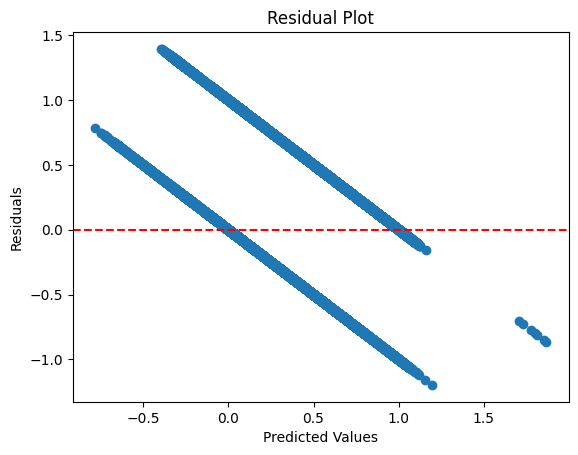

In [44]:
# The data seems to be scattered around the horizontal line
# This indicates linearity
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()


# **Splitting the Dataset:**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.1, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

## Decision trees for dimensionality reduction

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [47]:
clf = clf.fit(X_train, y_train)

In [48]:
importance_features_dt = clf.feature_importances_
inds_dt = importance_features_dt.argsort()[::-1]

In [49]:
print("Feature ranking are")
for i in range(X_train.shape[1]):
    print("%d. feature %d (%s) w. score %f" % (i+1, inds_dt[i], list(X)[i], importance_features_dt[inds_dt[i]]))

Feature ranking are
1. feature 26 (Airline) w. score 0.403691
2. feature 27 (Origin) w. score 0.362027
3. feature 25 (Dest) w. score 0.027770
4. feature 10 (Diverted) w. score 0.026149
5. feature 5 (CRSDepTime) w. score 0.021725
6. feature 4 (DepTime) w. score 0.016964
7. feature 11 (CRSElapsedTime) w. score 0.015309
8. feature 23 (Distance) w. score 0.012707
9. feature 6 (Quarter) w. score 0.011252
10. feature 19 (Month) w. score 0.008945
11. feature 7 (DayofMonth) w. score 0.008302
12. feature 9 (DayOfWeek) w. score 0.008282
13. feature 14 (Marketing_Airline_Network) w. score 0.008156
14. feature 16 (Operated_or_Branded_Code_Share_Partners) w. score 0.008092
15. feature 20 (Flight_Number_Marketing_Airline) w. score 0.007079
16. feature 24 (Operating_Airline) w. score 0.007004
17. feature 15 (Flight_Number_Operating_Airline) w. score 0.005154
18. feature 0 (OriginAirportID) w. score 0.004739
19. feature 2 (OriginAirportSeqID) w. score 0.004521
20. feature 22 (OriginCityMarketID) w. sc

## Dimensionality reduction using autoencoders

In [50]:
from keras.layers import Input, Dense
from keras.models import Model

2024-03-27 08:18:19.292733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 08:18:19.293013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 08:18:19.474596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [51]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X_train)

In [52]:
# Definign basic parameters for the autoencoder
input_dim = X_scale.shape[1]
encoding_dim = 10
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation = "relu")(encoder)
autoencoder = Model(inputs=input_layer, outputs = decoder)

In [53]:
autoencoder.compile(optimizer="adam", loss="categorical_crossentropy")

In [54]:
X_train_ae, X_test_ae, y_train_ae, y_test_ae = train_test_split(X_scale[:500000], y_train[:500000], test_size=0.2, random_state=42)

In [55]:
autoencoder.fit(X_train_ae, X_train_ae, epochs=20, batch_size=32, shuffle=True, validation_data=(X_test_ae, X_test_ae))

Epoch 1/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 57.5126 - val_loss: 50.2785
Epoch 2/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 50.2566 - val_loss: 50.1463
Epoch 3/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 50.1756 - val_loss: 50.0855
Epoch 4/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 50.1150 - val_loss: 50.0799
Epoch 5/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 50.1257 - val_loss: 50.0745
Epoch 6/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 50.0939 - val_loss: 50.0728
Epoch 7/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 50.1332 - val_loss: 50.0756
Epoch 8/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 50.1028 - val_loss: 50.0719
Epoch 9/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 50.1116 - val_loss: 50.0811
Epoch 10/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 50.1381 - val_loss: 50.0721
Epoch 11/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 50.

In [56]:
weights = autoencoder.layers[1].get_weights()[0]
importance_features_ae = abs(weights).mean(axis=1)
inds_ae = importance_features_ae.argsort()[::-1]

In [57]:
print("Feature ranking are")
for i in range(X_train.shape[1]):
    print("%d. feature %d (%s) w. score %f" % (i+1, inds_ae[i], list(X)[i], importance_features_ae[inds_ae[i]]))

Feature ranking are
1. feature 16 (Airline) w. score 0.602988
2. feature 13 (Origin) w. score 0.541722
3. feature 14 (Dest) w. score 0.511458
4. feature 28 (Diverted) w. score 0.470077
5. feature 24 (CRSDepTime) w. score 0.462215
6. feature 9 (DepTime) w. score 0.445833
7. feature 20 (CRSElapsedTime) w. score 0.427508
8. feature 5 (Distance) w. score 0.376224
9. feature 11 (Quarter) w. score 0.343340
10. feature 15 (Month) w. score 0.325077
11. feature 22 (DayofMonth) w. score 0.315340
12. feature 17 (DayOfWeek) w. score 0.314143
13. feature 26 (Marketing_Airline_Network) w. score 0.306536
14. feature 21 (Operated_or_Branded_Code_Share_Partners) w. score 0.279007
15. feature 18 (Flight_Number_Marketing_Airline) w. score 0.268283
16. feature 2 (Operating_Airline) w. score 0.262717
17. feature 12 (Flight_Number_Operating_Airline) w. score 0.260086
18. feature 7 (OriginAirportID) w. score 0.257103
19. feature 23 (OriginAirportSeqID) w. score 0.232227
20. feature 8 (OriginCityMarketID) w. 

### Selecting features based on the methods above

In [58]:
selected_features = X_train[:,inds_ae[:14]]

In [59]:
selected_features.shape

(2929037, 14)

# **Checking the balance in the dataset:**

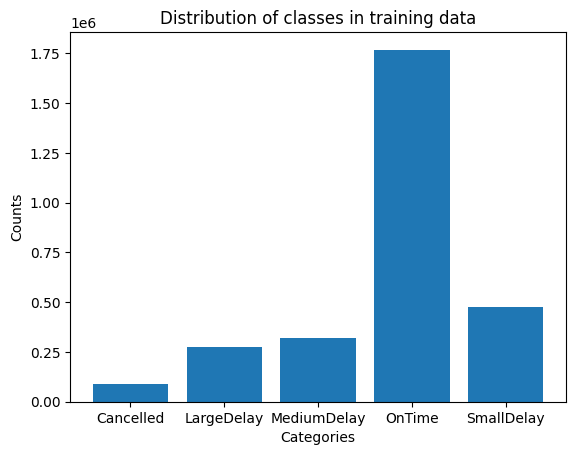

In [60]:
# 0 - "Cancelled"
# 1 - "LargeDelay"
# 2 - "MediumDelay"
# 3 - "OnTime"
# 4 - "SmallDelay"

# Sum the values of each column
cats = ["Cancelled","LargeDelay","MediumDelay","OnTime","SmallDelay"]
counts = [np.sum(y_train[:,i]) for i in range(5)]

# Plot a histogram of the distribution
plt.bar(cats, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of classes in training data')
plt.show()

In [61]:
# Performing undersampling to deal with imbalance of dataset
"""Undersampling was chosen to avoid overfitting the model, 
and as the dataset if pretty big there should not be too much loss of info in the majority classes
"""
from imblearn.under_sampling import RandomUnderSampler
randomUSampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = randomUSampler.fit_resample(selected_features, y_train)

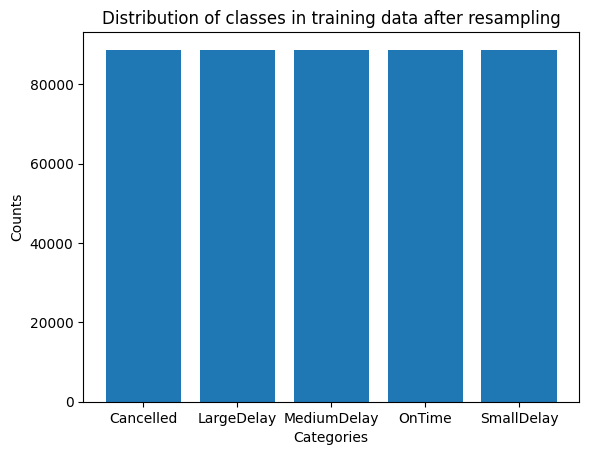

In [62]:
# Sum the values of each column
cats = ["Cancelled","LargeDelay","MediumDelay","OnTime","SmallDelay"]
counts = [np.sum(y_train_resampled[:,i]) for i in range(5)]

# Plot a histogram of the distribution
plt.bar(cats, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of classes in training data after resampling')
plt.show()

In [63]:
X_train_resampled.shape

(443595, 14)

In [64]:
X_val = X_val[:,inds_ae[:14]]
X_test = X_test[:,inds_ae[:14]]

In [65]:
X_val.shape

(732260, 14)

In [66]:
X_test.shape

(406811, 14)

# Save the preprocessed data

In [ ]:
np.save('X_train.npy', selected_features)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)
np.save('X_train_resampled.npy', X_train_resampled)
np.save('y_train_resampled.npy', y_train_resampled)